### Importing Required Libraries

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import os

In [34]:
labels_old=pd.read_csv('/kaggle/input/dog-breed-identification/labels.csv')
labels_old.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [35]:
train_img_path = '/kaggle/input/dog-breed-identification/train/'
test_img_path = '/kaggle/input/dog-breed-identification/test/'

### Data Preprocessing

In [36]:
y_train = labels_old['breed']
y_train.nunique()

120

In [37]:
train_labels=labels_old.assign(train_img_path=lambda x: train_img_path + x['id'] +'.jpg')
train_labels.head()

,id,breed,train_img_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,/kaggle/input/dog-breed-identification/train/0...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,/kaggle/input/dog-breed-identification/train/0...
2,001cdf01b096e06d78e9e5112d419397,pekinese,/kaggle/input/dog-breed-identification/train/0...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,/kaggle/input/dog-breed-identification/train/0...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,/kaggle/input/dog-breed-identification/train/0...


In [38]:
X_train = train_labels['train_img_path']
X_train

0        /kaggle/input/dog-breed-identification/train/0...
1        /kaggle/input/dog-breed-identification/train/0...
2        /kaggle/input/dog-breed-identification/train/0...
3        /kaggle/input/dog-breed-identification/train/0...
4        /kaggle/input/dog-breed-identification/train/0...
                               ...                        
10217    /kaggle/input/dog-breed-identification/train/f...
10218    /kaggle/input/dog-breed-identification/train/f...
10219    /kaggle/input/dog-breed-identification/train/f...
10220    /kaggle/input/dog-breed-identification/train/f...
10221    /kaggle/input/dog-breed-identification/train/f...
Name: train_img_path, Length: 10222, dtype: object

In [39]:
len(X_train), len(y_train)

(10222, 10222)

In [40]:
import random
# shuffle X and y
combined = list(zip(X_train, y_train))
random.shuffle(combined)

In [41]:
sample = pd.read_csv('/kaggle/input/dog-breed-identification/sample_submission.csv')
sample

test_data = sample[["id"]]
test_data

test_labels=test_data.assign(test_img_path=lambda x: test_img_path + x['id'] +'.jpg')
test_labels.head()

,id,test_img_path
0,000621fb3cbb32d8935728e48679680e,/kaggle/input/dog-breed-identification/test/00...
1,00102ee9d8eb90812350685311fe5890,/kaggle/input/dog-breed-identification/test/00...
2,0012a730dfa437f5f3613fb75efcd4ce,/kaggle/input/dog-breed-identification/test/00...
3,001510bc8570bbeee98c8d80c8a95ec1,/kaggle/input/dog-breed-identification/test/00...
4,001a5f3114548acdefa3d4da05474c2e,/kaggle/input/dog-breed-identification/test/00...


In [42]:
X_test = test_labels['test_img_path']
X_test

0        /kaggle/input/dog-breed-identification/test/00...
1        /kaggle/input/dog-breed-identification/test/00...
2        /kaggle/input/dog-breed-identification/test/00...
3        /kaggle/input/dog-breed-identification/test/00...
4        /kaggle/input/dog-breed-identification/test/00...
                               ...                        
10352    /kaggle/input/dog-breed-identification/test/ff...
10353    /kaggle/input/dog-breed-identification/test/ff...
10354    /kaggle/input/dog-breed-identification/test/ff...
10355    /kaggle/input/dog-breed-identification/test/ff...
10356    /kaggle/input/dog-breed-identification/test/ff...
Name: test_img_path, Length: 10357, dtype: object

In [43]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Label and one-hot encoding y labels
le = LabelEncoder()
le.fit(y_train)
y_ohe = to_categorical(le.transform(y_train))
y_ohe = np.array(y_ohe)

In [44]:
y_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
doggy_breeds = pd.DataFrame(train_labels['breed'])
doggy_breeds['Sorted_Breeds'] = sorted(doggy_breeds['breed'])
sorted_breeds = doggy_breeds['Sorted_Breeds'].unique()
sorted_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [46]:
from sklearn.model_selection import train_test_split
from keras.utils import img_to_array, load_img

img_data = np.array([img_to_array(load_img(img, target_size = (192,192)))
                     for img in X_train])
test_img_data = np.array([img_to_array(load_img(img, target_size = (192,192)))
                     for img in X_test])


In [47]:
img_data.shape

(10222, 192, 192, 3)

In [48]:
test_img_data.shape

(10357, 192, 192, 3)

In [49]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val=train_test_split(img_data[:1000],y_ohe[:1000],test_size=0.2)
print(X_tr.shape)
print(y_tr.shape)
print(X_val.shape)
print(y_val.shape)

(800, 192, 192, 3)
(800, 120)
(200, 192, 192, 3)
(200, 120)


### Building a Model

In [85]:
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, # only use rescale=1./255 if training from scratch
                                  rotation_range = 30,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  horizontal_flip = True) # CHECK

train_generator = train_datagen.flow(X_tr, y_tr,
                                     shuffle = False, batch_size = batch_size, seed = 1)

# Create validation generator
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # do not augment validation data

val_generator = val_datagen.flow(X_val, y_val,
                                shuffle = False, batch_size = batch_size, seed = 1)

In [90]:
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.utils import to_categorical
from keras.utils import plot_model

# load InceptionV3 pre-trained model
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (192,192,3))

model = models.Sequential()
model.add(base_model) 
model.add(GlobalAveragePooling2D())
model.add(Flatten()) 
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(120, activation = 'softmax'))

In [91]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      self.model.stop_training = True

In [92]:
print('Number of trainable weights before freezing the base layer:', len(model.trainable_weights))
model.layers[0].trainable = False
print('Number of trainable weights after freezing the base layer:', len(model.trainable_weights))

Number of trainable weights before freezing the base layer: 196
Number of trainable weights after freezing the base layer: 8


In [93]:
model.compile(Adam(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d_8  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                      

In [94]:
callbacks = myCallback()
train_steps_per_epoch = X_tr.shape[0] // batch_size
val_steps_per_epoch = X_val.shape[0] // batch_size
epochs = 100

history = model.fit(train_generator,
                             steps_per_epoch = train_steps_per_epoch,
                             validation_data = val_generator,
                             validation_steps = val_steps_per_epoch,
                             epochs = epochs, verbose = 1, callbacks=[callbacks])

Epoch 1/100
12/12 [==============================] - 13s 591ms/step - loss: 4.9286 - accuracy: 0.0340 - val_loss: 4.5551 - val_accuracy: 0.0729
Epoch 2/100
12/12 [==============================] - 6s 516ms/step - loss: 4.3144 - accuracy: 0.0992 - val_loss: 3.9423 - val_accuracy: 0.2344
Epoch 3/100
12/12 [==============================] - 6s 530ms/step - loss: 3.6201 - accuracy: 0.2527 - val_loss: 3.1290 - val_accuracy: 0.3333
Epoch 4/100
12/12 [==============================] - 6s 520ms/step - loss: 2.8034 - accuracy: 0.3465 - val_loss: 2.3418 - val_accuracy: 0.4844
Epoch 5/100
12/12 [==============================] - 6s 519ms/step - loss: 2.1931 - accuracy: 0.4402 - val_loss: 2.1382 - val_accuracy: 0.4531
Epoch 6/100
12/12 [==============================] - 6s 511ms/step - loss: 1.9147 - accuracy: 0.4633 - val_loss: 1.9293 - val_accuracy: 0.5156
Epoch 7/100
12/12 [==============================] - 7s 537ms/step - loss: 1.6655 - accuracy: 0.5312 - val_loss: 1.8153 - val_accuracy: 0.531

In [95]:
X_val1 = X_val / 255. # 0-1'e yeniden ölçeklendirin. Maksimum RGB değeri olarak 255'e bölün
val_predictions = model.predict(X_val1)

# model predictions
y_val_predict = le.classes_[np.argmax(val_predictions,axis=1)]
# target labels
target_labels = le.classes_[np.argmax(y_val,axis=1)]

# dataframe
predict_df = pd.DataFrame({'Target_Labels': target_labels, 'Predictions': y_val_predict})
predict_df.head(20)

7/7 [==============================] - 2s 58ms/step


,Target_Labels,Predictions
0,vizsla,vizsla
1,saluki,saluki
2,bloodhound,bloodhound
3,wire-haired_fox_terrier,wire-haired_fox_terrier
4,standard_poodle,newfoundland
5,keeshond,keeshond
6,cocker_spaniel,cocker_spaniel
7,irish_setter,bloodhound
8,scottish_deerhound,mexican_hairless
9,rhodesian_ridgeback,bull_mastiff


In [97]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(target_labels, y_val_predict)
print (test_acc)

0.595


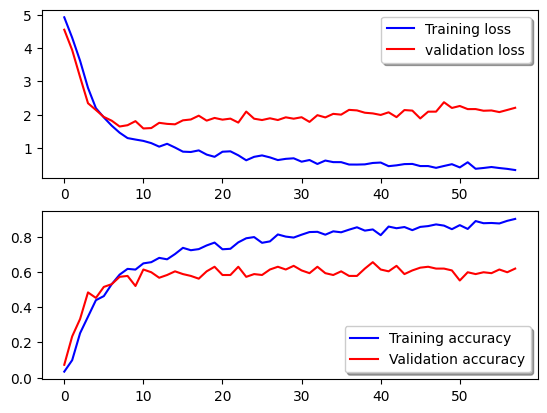

In [98]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Hyper-parameter Optimization

In [151]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


In [152]:
def build_model(hp):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

    model = models.Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1, default=0.3)))
    model.add(Dense(hp.Int('units', min_value=256, max_value=1024, step=256, default=512), activation='relu'))
    model.add(Dense(120, activation='softmax'))

    model.layers[0].trainable = False

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-6, max_value=1e-3, sampling='LOG', default=1e-4)),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [153]:
tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=5,  # You can adjust this based on your resources and time
    directory='my_tuner_dir',
    project_name='inception_tuner'
)
tuner.search(train_generator,
             steps_per_epoch=train_steps_per_epoch,
             validation_data=val_generator,
             validation_steps=val_steps_per_epoch,
             epochs=epochs,
             verbose=1,
             callbacks=[callbacks])


Trial 5 Complete [00h 11m 03s]
accuracy: 0.9021739363670349

Best accuracy So Far: 0.9130434989929199
Total elapsed time: 00h 40m 42s


In [158]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hps.values)

Best Hyperparameters: {'dropout': 0.2, 'units': 1024, 'learning_rate': 5.754648937006841e-05}
